<a href="https://colab.research.google.com/github/sboonpan/Project_Time-Series/blob/main/SET_CUSUM_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
import glob
import pandas as pd
from  google.colab import drive 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15.0, 10.0)

import warnings
warnings.simplefilter("ignore")

In [220]:
#drive.mount('/gdrive')

In [221]:
#file_path = glob.glob("/gdrive/My Drive/Data/Forex/XAUUSD1h2001-2021.csv") 
#for file in file_path:
  #df = pd.read_csv(file)
#print(df)

In [222]:
path = 'https://raw.githubusercontent.com/sboonpan/Project_Time-Series/main/SET.csv'

In [223]:
df = pd.read_csv(path)
df

,Date,Open,High,Low,Close,Volume
0,1975-04-30,100.00,100.00,100.00,100.00,163310
1,1975-05-02,99.96,99.96,99.96,99.96,150220
2,1975-05-06,99.53,99.53,99.53,99.53,260100
3,1975-05-07,99.13,99.13,99.13,99.13,35480
4,1975-05-08,97.88,97.88,97.88,97.88,52500
...,...,...,...,...,...,...
11206,2020-12-24,1420.60,1453.87,1409.75,1451.52,25464477270
11207,2020-12-25,1463.32,1486.84,1462.77,1486.31,21092586140
11208,2020-12-28,1505.15,1512.99,1452.48,1452.67,24908668980
11209,2020-12-29,1452.39,1468.60,1440.59,1461.95,22526434080


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11211 entries, 0 to 11210
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    11211 non-null  object 
 1   Open    11211 non-null  float64
 2   High    11211 non-null  float64
 3   Low     11211 non-null  float64
 4   Close   11211 non-null  float64
 5   Volume  11211 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 525.6+ KB


In [225]:
df.loc[:,'Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace = True)
#df.drop(columns = ['Date'], inplace = True)
df

,Open,High,Low,Close,Volume
Date,,,,,
1975-04-30,100.00,100.00,100.00,100.00,163310
1975-05-02,99.96,99.96,99.96,99.96,150220
1975-05-06,99.53,99.53,99.53,99.53,260100
1975-05-07,99.13,99.13,99.13,99.13,35480
1975-05-08,97.88,97.88,97.88,97.88,52500
...,...,...,...,...,...
2020-12-24,1420.60,1453.87,1409.75,1451.52,25464477270
2020-12-25,1463.32,1486.84,1462.77,1486.31,21092586140
2020-12-28,1505.15,1512.99,1452.48,1452.67,24908668980


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11211 entries, 1975-04-30 to 2020-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    11211 non-null  float64
 1   High    11211 non-null  float64
 2   Low     11211 non-null  float64
 3   Close   11211 non-null  float64
 4   Volume  11211 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 525.5 KB


In [227]:
condition_1 = df['Volume'] != 0
df = df[ condition_1 ]
df

,Open,High,Low,Close,Volume
Date,,,,,
1975-04-30,100.00,100.00,100.00,100.00,163310
1975-05-02,99.96,99.96,99.96,99.96,150220
1975-05-06,99.53,99.53,99.53,99.53,260100
1975-05-07,99.13,99.13,99.13,99.13,35480
1975-05-08,97.88,97.88,97.88,97.88,52500
...,...,...,...,...,...
2020-12-24,1420.60,1453.87,1409.75,1451.52,25464477270
2020-12-25,1463.32,1486.84,1462.77,1486.31,21092586140
2020-12-28,1505.15,1512.99,1452.48,1452.67,24908668980


In [228]:
condition_2 = df['Close'].shift(1) != df['Close']
df = df[ condition_2 ]
df

,Open,High,Low,Close,Volume
Date,,,,,
1975-04-30,100.00,100.00,100.00,100.00,163310
1975-05-02,99.96,99.96,99.96,99.96,150220
1975-05-06,99.53,99.53,99.53,99.53,260100
1975-05-07,99.13,99.13,99.13,99.13,35480
1975-05-08,97.88,97.88,97.88,97.88,52500
...,...,...,...,...,...
2020-12-24,1420.60,1453.87,1409.75,1451.52,25464477270
2020-12-25,1463.32,1486.84,1462.77,1486.31,21092586140
2020-12-28,1505.15,1512.99,1452.48,1452.67,24908668980


In [229]:
condition_3 =  df['High'] != df['Low']
df = df[ condition_3 ]
df

,Open,High,Low,Close,Volume
Date,,,,,
1990-09-13,796.98,797.26,791.58,793.09,24900926
1990-09-14,793.09,793.33,755.68,759.98,27874684
1990-09-17,759.98,759.98,621.41,702.48,23365500
1990-09-18,693.76,697.46,678.98,687.93,33344196
1990-09-19,687.93,701.28,680.12,686.63,33351540
...,...,...,...,...,...
2020-12-24,1420.60,1453.87,1409.75,1451.52,25464477270
2020-12-25,1463.32,1486.84,1462.77,1486.31,21092586140
2020-12-28,1505.15,1512.99,1452.48,1452.67,24908668980


In [230]:
df.resample(rule = 'A').mean()

,Open,High,Low,Close,Volume
Date,,,,,
1990-12-31,651.097083,658.296806,639.680694,648.816806,3.887805e+07
1991-12-31,733.956831,740.724280,726.862675,734.043704,4.293043e+07
1992-12-31,798.415203,803.937602,791.324878,797.982886,1.129924e+08
1993-12-31,1017.211592,1026.340286,1009.443755,1019.239755,1.329551e+08
1994-12-31,1396.604571,1406.779061,1382.399878,1395.046816,9.408943e+07
1995-12-31,1294.318577,1301.760081,1283.948211,1294.218618,8.485441e+07
1996-12-31,1167.048607,1173.474590,1155.678934,1165.669918,7.934064e+07
1997-12-31,598.820405,604.644656,589.783482,596.945709,1.209766e+08
1998-12-31,352.315861,357.192295,346.713852,351.559426,2.903113e+08


In [231]:
df.pct_change().resample(rule = 'A').std()

,Open,High,Low,Close,Volume
Date,,,,,
1990-12-31,0.029340,0.026619,0.034928,0.028563,0.560058
1991-12-31,0.018769,0.015954,0.016964,0.018750,0.369270
1992-12-31,0.016578,0.014219,0.016823,0.016340,0.378849
1993-12-31,0.013863,0.013018,0.012249,0.012987,0.355692
1994-12-31,0.016933,0.015651,0.016257,0.016407,0.355681
1995-12-31,0.013529,0.011787,0.013357,0.012519,0.446680
1996-12-31,0.014494,0.012106,0.013674,0.013549,0.413967
1997-12-31,0.026569,0.022790,0.022765,0.022954,102.911648
1998-12-31,0.030332,0.029037,0.025953,0.029654,0.442147


In [232]:
threshlod_cusum = df.pct_change().resample(rule = 'A').std().Close.min()
threshlod_cusum = threshlod_cusum / 2
threshlod_cusum

0.0020384263682978647

In [233]:
def cusum_filter(series, threshold, ingredient='ret'):
    t_events = []
    if ingredient == 'ret':
        returns = series.pct_change()
    elif ingredient == 'log_ret':
        returns = series.apply(np.log).diff()
    returns = returns.iloc[1:]        # remove first nan
    sum_pos = 0
    sum_neg = 0
    for index, ret in returns.items():
        sum_pos += max(sum_pos + ret, 0)
        sum_neg += max(sum_neg - ret, 0)
        
        if sum_pos > threshold:
            t_events.append(index)
            sum_pos = 0

        if sum_neg > threshold:
            t_events.append(index)
            sum_neg = 0
        
    return pd.DatetimeIndex(t_events)

In [234]:
t_events = cusum_filter(df['Close'], threshlod_cusum, ingredient='log_ret')
t_events

DatetimeIndex(['1990-09-14', '1990-09-17', '1990-09-18', '1990-09-20',
               '1990-09-21', '1990-09-24', '1990-09-25', '1990-09-26',
               '1990-09-27', '1990-09-28',
               ...
               '2020-12-14', '2020-12-16', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', length=6352, freq=None)

In [235]:
sampling = df.loc[t_events]
sampling

,Open,High,Low,Close,Volume
Date,,,,,
1990-09-14,793.09,793.33,755.68,759.98,27874684
1990-09-17,759.98,759.98,621.41,702.48,23365500
1990-09-18,693.76,697.46,678.98,687.93,33344196
1990-09-20,686.63,686.63,646.40,647.35,36360012
1990-09-21,647.35,647.56,621.41,637.95,33053832
...,...,...,...,...,...
2020-12-24,1420.60,1453.87,1409.75,1451.52,25464477270
2020-12-25,1463.32,1486.84,1462.77,1486.31,21092586140
2020-12-28,1505.15,1512.99,1452.48,1452.67,24908668980


In [236]:
sampling.set_index(t_events, inplace=True)
sampling.dropna(inplace = True)
sampling

,Open,High,Low,Close,Volume
1990-09-14,793.09,793.33,755.68,759.98,27874684
1990-09-17,759.98,759.98,621.41,702.48,23365500
1990-09-18,693.76,697.46,678.98,687.93,33344196
1990-09-20,686.63,686.63,646.40,647.35,36360012
1990-09-21,647.35,647.56,621.41,637.95,33053832
...,...,...,...,...,...
2020-12-24,1420.60,1453.87,1409.75,1451.52,25464477270
2020-12-25,1463.32,1486.84,1462.77,1486.31,21092586140
2020-12-28,1505.15,1512.99,1452.48,1452.67,24908668980
2020-12-29,1452.39,1468.60,1440.59,1461.95,22526434080


In [237]:
data = sampling.copy()

In [238]:
data.index.name = 'Date'

In [239]:
data

,Open,High,Low,Close,Volume
Date,,,,,
1990-09-14,793.09,793.33,755.68,759.98,27874684
1990-09-17,759.98,759.98,621.41,702.48,23365500
1990-09-18,693.76,697.46,678.98,687.93,33344196
1990-09-20,686.63,686.63,646.40,647.35,36360012
1990-09-21,647.35,647.56,621.41,637.95,33053832
...,...,...,...,...,...
2020-12-24,1420.60,1453.87,1409.75,1451.52,25464477270
2020-12-25,1463.32,1486.84,1462.77,1486.31,21092586140
2020-12-28,1505.15,1512.99,1452.48,1452.67,24908668980


In [240]:
data.resample(rule = 'A').mean()

,Open,High,Low,Close,Volume
Date,,,,,
1990-12-31,648.270156,655.715156,635.991719,645.735625,3.959508e+07
1991-12-31,735.595694,742.740278,728.171296,735.698148,4.376153e+07
1992-12-31,800.062192,805.725799,792.619589,799.547717,1.168982e+08
1993-12-31,1015.697658,1025.292883,1007.910856,1018.041622,1.333953e+08
1994-12-31,1395.656372,1406.324047,1381.052698,1394.137256,9.479980e+07
1995-12-31,1292.722029,1300.451739,1281.735314,1292.640435,8.567374e+07
1996-12-31,1157.697441,1164.426493,1145.602275,1155.951374,8.111333e+07
1997-12-31,598.095087,604.046696,588.782304,596.112609,1.232694e+08
1998-12-31,353.198178,358.217111,347.378978,352.402267,2.951876e+08


In [241]:
data.pct_change().resample(rule = 'A').std()

,Open,High,Low,Close,Volume
Date,,,,,
1990-12-31,0.031188,0.028251,0.036654,0.029989,0.583666
1991-12-31,0.019881,0.016808,0.017821,0.019906,0.395431
1992-12-31,0.017516,0.014998,0.017825,0.017300,0.411148
1993-12-31,0.014441,0.013370,0.012763,0.013569,0.360763
1994-12-31,0.017589,0.016413,0.017127,0.017493,0.370803
1995-12-31,0.014400,0.012494,0.014186,0.013668,0.475776
1996-12-31,0.015364,0.012803,0.014517,0.014527,0.417253
1997-12-31,0.027524,0.023723,0.023795,0.023764,106.646947
1998-12-31,0.031089,0.029866,0.026942,0.030896,0.441724


In [242]:
data['Returns'] = np.log(data['Close']/data['Close'].shift(1))
data = data.dropna()
data

,Open,High,Low,Close,Volume,Returns
Date,,,,,,
1990-09-17,759.98,759.98,621.41,702.48,23365500,-0.078675
1990-09-18,693.76,697.46,678.98,687.93,33344196,-0.020930
1990-09-20,686.63,686.63,646.40,647.35,36360012,-0.060800
1990-09-21,647.35,647.56,621.41,637.95,33053832,-0.014627
1990-09-24,637.95,648.88,635.23,647.11,158091600,0.014256
...,...,...,...,...,...,...
2020-12-24,1420.60,1453.87,1409.75,1451.52,25464477270,0.024761
2020-12-25,1463.32,1486.84,1462.77,1486.31,21092586140,0.023685
2020-12-28,1505.15,1512.99,1452.48,1452.67,24908668980,-0.022893


In [243]:
mpl.rcParams['figure.figsize'] = (10.0, 6.0)

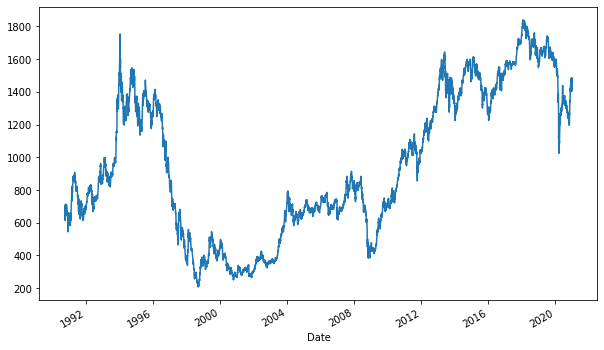

In [244]:
data['Close'].plot()

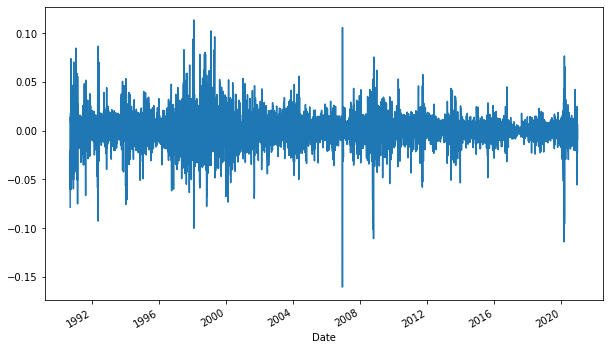

In [245]:
data['Returns'].plot()

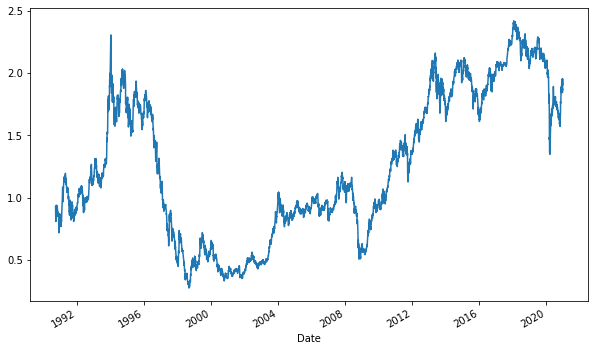

In [246]:
data['Returns'].cumsum().apply(np.exp).plot()

In [247]:
data_open = data['Open']
#data_close

In [248]:
data_high = data['High']
#data_close

In [249]:
data_low = data['Low']
#data_close

In [250]:
data_close = data['Close']
#data_close

In [251]:
data_ret = data['Returns']
#data_ret

In [252]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

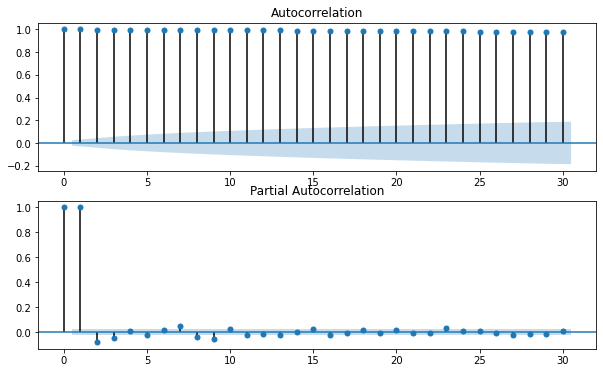

In [253]:
n_lag = 30
sig_lv = 0.05
fig, ax = plt.subplots(2, 1)
plot_acf(data_open, ax=ax[0], lags=n_lag, alpha=sig_lv)
plot_pacf(data_open, ax=ax[1],  lags=n_lag, alpha=sig_lv);

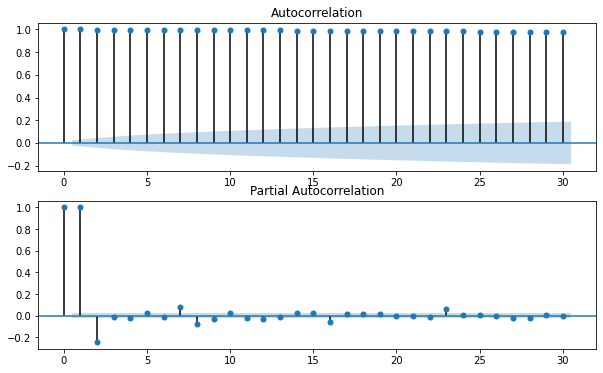

In [254]:
n_lag = 30
sig_lv = 0.05
fig, ax = plt.subplots(2, 1)
plot_acf(data_high, ax=ax[0], lags=n_lag, alpha=sig_lv)
plot_pacf(data_high, ax=ax[1],  lags=n_lag, alpha=sig_lv);

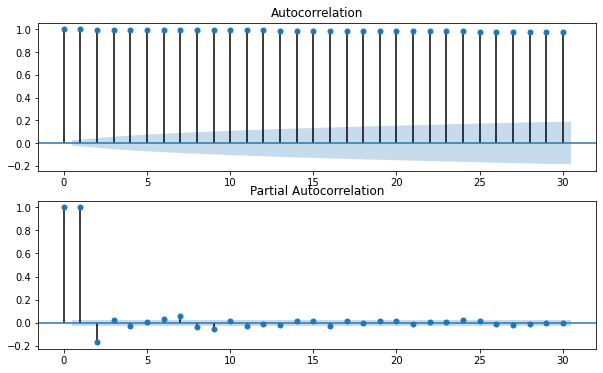

In [255]:
n_lag = 30
sig_lv = 0.05
fig, ax = plt.subplots(2, 1)
plot_acf(data_low, ax=ax[0], lags=n_lag, alpha=sig_lv)
plot_pacf(data_low, ax=ax[1],  lags=n_lag, alpha=sig_lv);

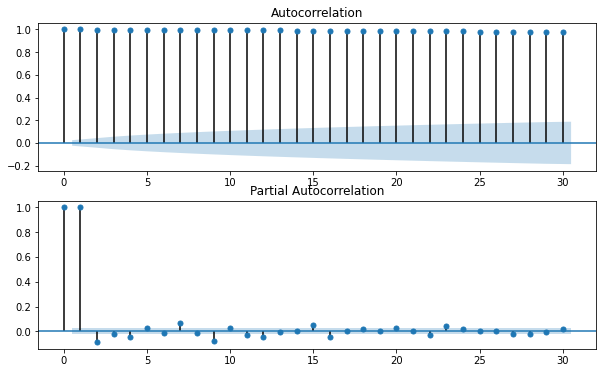

In [256]:
n_lag = 30
sig_lv = 0.05
fig, ax = plt.subplots(2, 1)
plot_acf(data_close, ax=ax[0], lags=n_lag, alpha=sig_lv)
plot_pacf(data_close, ax=ax[1],  lags=n_lag, alpha=sig_lv);

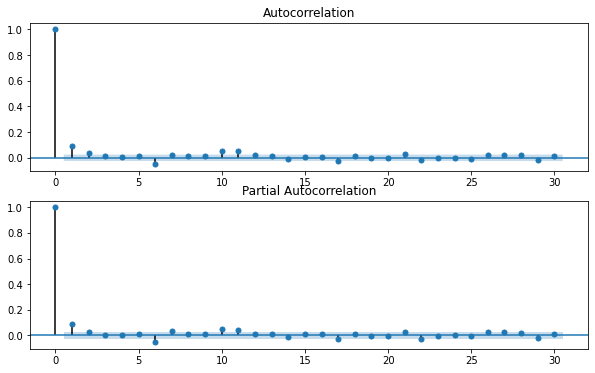

In [257]:
n_lag = 30
sig_lv = 0.05
fig, ax = plt.subplots(2, 1)
plot_acf(data_ret, ax=ax[0], lags=n_lag, alpha=sig_lv)
plot_pacf(data_ret, ax=ax[1],  lags=n_lag, alpha=sig_lv);

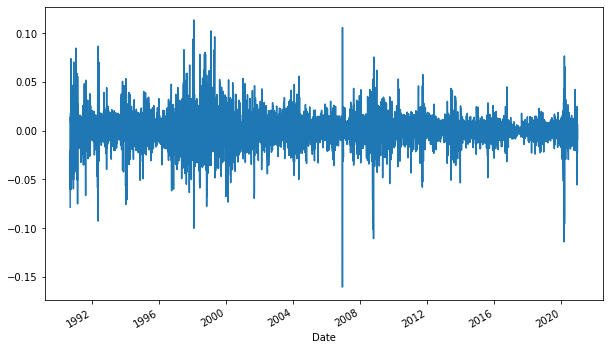

In [258]:
data['Returns'].plot()

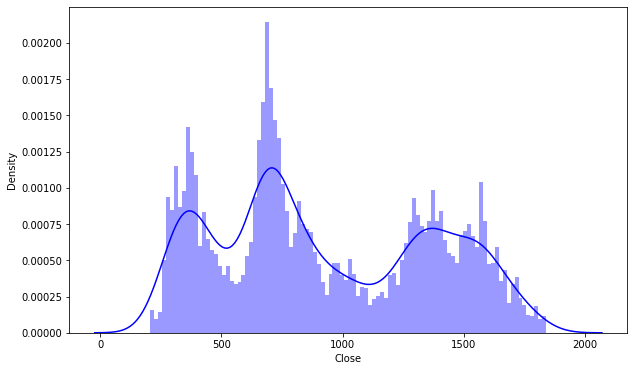

In [259]:
sns.distplot(data['Close'], color = 'blue', bins = 100)

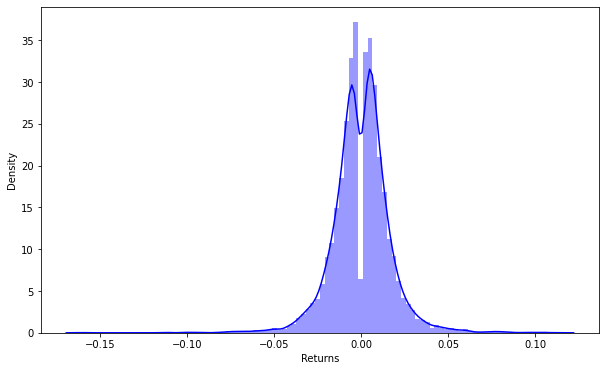

In [260]:
sns.distplot(data['Returns'], color = 'blue', bins = 100)

In [261]:
data_outliers = data['Returns'].rolling(20).agg(["mean", "std"])
data_outliers = data.join(data_outliers)
data_outliers

,Open,High,Low,Close,Volume,Returns,mean,std
Date,,,,,,,,
1990-09-17,759.98,759.98,621.41,702.48,23365500,-0.078675,NaN,NaN
1990-09-18,693.76,697.46,678.98,687.93,33344196,-0.020930,NaN,NaN
1990-09-20,686.63,686.63,646.40,647.35,36360012,-0.060800,NaN,NaN
1990-09-21,647.35,647.56,621.41,637.95,33053832,-0.014627,NaN,NaN
1990-09-24,637.95,648.88,635.23,647.11,158091600,0.014256,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-12-24,1420.60,1453.87,1409.75,1451.52,25464477270,0.024761,0.003088,0.018044
2020-12-25,1463.32,1486.84,1462.77,1486.31,21092586140,0.023685,0.004095,0.018624
2020-12-28,1505.15,1512.99,1452.48,1452.67,24908668980,-0.022893,0.002229,0.019388


In [262]:
def outlier_detection(data, n_sigmas = 3):
    
    x = data["Returns"]
    mu = data["mean"]
    sigma = data["std"]
    
    if (x > mu + sigma*n_sigmas) | (x < mu - n_sigmas * sigma):
        return 1
    else:
        return 0

In [263]:
data_outliers.apply(outlier_detection, axis=1)

Date
1990-09-17    0
1990-09-18    0
1990-09-20    0
1990-09-21    0
1990-09-24    0
             ..
2020-12-24    0
2020-12-25    0
2020-12-28    0
2020-12-29    0
2020-12-30    0
Length: 6361, dtype: int64

In [264]:
data_outliers['outlier'] = data_outliers.apply(outlier_detection, axis=1)

In [265]:
con = data_outliers['outlier'] == 1
data_outliers[con]

,Open,High,Low,Close,Volume,Returns,mean,std,outlier
Date,,,,,,,,,
1991-01-17,582.48,635.60,582.16,633.89,46063336,0.084581,-0.001223,0.028586,1
1992-04-21,808.84,808.84,782.20,785.09,46601252,-0.047012,-0.001289,0.014512,1
1994-11-23,1378.93,1378.93,1302.98,1332.85,164450416,-0.051158,-0.006622,0.014786,1
1996-11-18,996.61,996.61,938.03,942.34,153454560,-0.060119,0.001372,0.019954,1
1999-02-12,317.63,347.67,317.01,347.43,424094688,0.102285,-0.005209,0.030600,1
1999-08-20,421.20,443.53,421.20,440.51,867201984,0.052452,-0.006019,0.019140,1
2000-01-05,471.52,477.17,464.06,465.85,511614112,-0.067660,0.006104,0.022895,1
2000-02-22,406.02,406.02,379.43,379.43,257556608,-0.073455,-0.011643,0.020420,1
2001-09-13,318.45,318.45,298.04,308.17,1244798464,-0.069562,-0.001376,0.021302,1


In [266]:
data_outliers[con].shape

(19, 9)

In [267]:
outliers = data_outliers.loc[data_outliers['outlier'] == 1,  ['Returns']]
outliers

,Returns
Date,
1991-01-17,0.084581
1992-04-21,-0.047012
1994-11-23,-0.051158
1996-11-18,-0.060119
1999-02-12,0.102285
1999-08-20,0.052452
2000-01-05,-0.067660
2000-02-22,-0.073455
2001-09-13,-0.069562


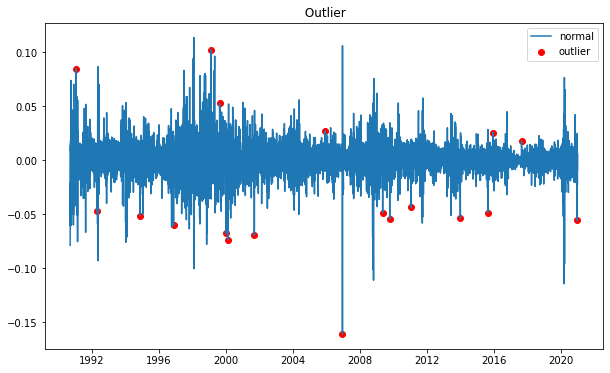

In [268]:
#import matplotlib as mpl
#mpl.rcParams['figure.figsize'] = (12.0, 8.0)

fig, ax = plt.subplots()

ax.plot(data_outliers.index, data_outliers["Returns"], label='normal')
ax.scatter(outliers.index, outliers["Returns"], color="red", label="outlier")
ax.set_title(f" Outlier")
ax.legend()
plt.show()

In [269]:
condition_4 = data_outliers['outlier'] != 1
data = data_outliers[condition_4]
data

,Open,High,Low,Close,Volume,Returns,mean,std,outlier
Date,,,,,,,,,
1990-09-17,759.98,759.98,621.41,702.48,23365500,-0.078675,NaN,NaN,0
1990-09-18,693.76,697.46,678.98,687.93,33344196,-0.020930,NaN,NaN,0
1990-09-20,686.63,686.63,646.40,647.35,36360012,-0.060800,NaN,NaN,0
1990-09-21,647.35,647.56,621.41,637.95,33053832,-0.014627,NaN,NaN,0
1990-09-24,637.95,648.88,635.23,647.11,158091600,0.014256,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
2020-12-24,1420.60,1453.87,1409.75,1451.52,25464477270,0.024761,0.003088,0.018044,0
2020-12-25,1463.32,1486.84,1462.77,1486.31,21092586140,0.023685,0.004095,0.018624,0
2020-12-28,1505.15,1512.99,1452.48,1452.67,24908668980,-0.022893,0.002229,0.019388,0


In [270]:
data = data.dropna()
data

,Open,High,Low,Close,Volume,Returns,mean,std,outlier
Date,,,,,,,,,
1990-10-17,653.69,653.69,646.43,646.99,26502278,-0.008863,-0.008048,0.036248,0
1990-10-18,647.56,649.34,644.41,649.28,28491500,0.003533,-0.003938,0.032259,0
1990-10-19,651.59,654.77,651.57,652.16,43333184,0.004426,-0.002670,0.032054,0
1990-10-22,652.16,683.59,652.16,683.33,67541304,0.046688,0.002705,0.030780,0
1990-10-24,684.51,718.37,684.51,709.35,99226072,0.037371,0.005304,0.031428,0
...,...,...,...,...,...,...,...,...,...
2020-12-24,1420.60,1453.87,1409.75,1451.52,25464477270,0.024761,0.003088,0.018044,0
2020-12-25,1463.32,1486.84,1462.77,1486.31,21092586140,0.023685,0.004095,0.018624,0
2020-12-28,1505.15,1512.99,1452.48,1452.67,24908668980,-0.022893,0.002229,0.019388,0


In [271]:
data.drop(columns = 'outlier', inplace = True)
data

,Open,High,Low,Close,Volume,Returns,mean,std
Date,,,,,,,,
1990-10-17,653.69,653.69,646.43,646.99,26502278,-0.008863,-0.008048,0.036248
1990-10-18,647.56,649.34,644.41,649.28,28491500,0.003533,-0.003938,0.032259
1990-10-19,651.59,654.77,651.57,652.16,43333184,0.004426,-0.002670,0.032054
1990-10-22,652.16,683.59,652.16,683.33,67541304,0.046688,0.002705,0.030780
1990-10-24,684.51,718.37,684.51,709.35,99226072,0.037371,0.005304,0.031428
...,...,...,...,...,...,...,...,...
2020-12-24,1420.60,1453.87,1409.75,1451.52,25464477270,0.024761,0.003088,0.018044
2020-12-25,1463.32,1486.84,1462.77,1486.31,21092586140,0.023685,0.004095,0.018624
2020-12-28,1505.15,1512.99,1452.48,1452.67,24908668980,-0.022893,0.002229,0.019388


In [272]:
data.drop(columns = ['mean',	'std'], inplace = True)
data

,Open,High,Low,Close,Volume,Returns
Date,,,,,,
1990-10-17,653.69,653.69,646.43,646.99,26502278,-0.008863
1990-10-18,647.56,649.34,644.41,649.28,28491500,0.003533
1990-10-19,651.59,654.77,651.57,652.16,43333184,0.004426
1990-10-22,652.16,683.59,652.16,683.33,67541304,0.046688
1990-10-24,684.51,718.37,684.51,709.35,99226072,0.037371
...,...,...,...,...,...,...
2020-12-24,1420.60,1453.87,1409.75,1451.52,25464477270,0.024761
2020-12-25,1463.32,1486.84,1462.77,1486.31,21092586140,0.023685
2020-12-28,1505.15,1512.99,1452.48,1452.67,24908668980,-0.022893


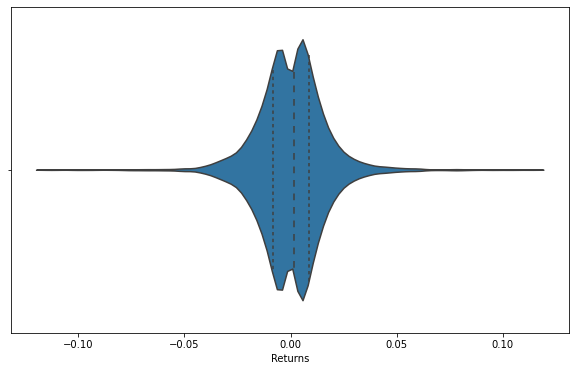

In [273]:
from scipy import stats
sns.violinplot(data['Returns'],inner="quartile")

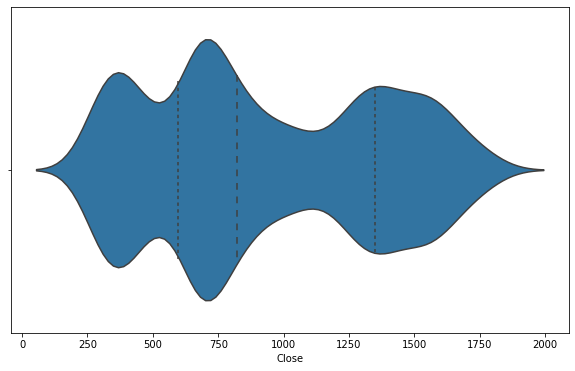

In [274]:
sns.violinplot(data['Close'],inner="quartile")

((array([-3.69575503, -3.46402686, -3.33648808, ...,  3.33648808,
          3.46402686,  3.69575503]),
  array([-0.11428186, -0.11090226, -0.10099442, ...,  0.10192694,
          0.10577031,  0.11349526])),
 (0.015679990293660285, 0.00020916300393513876, 0.9728540354265461))

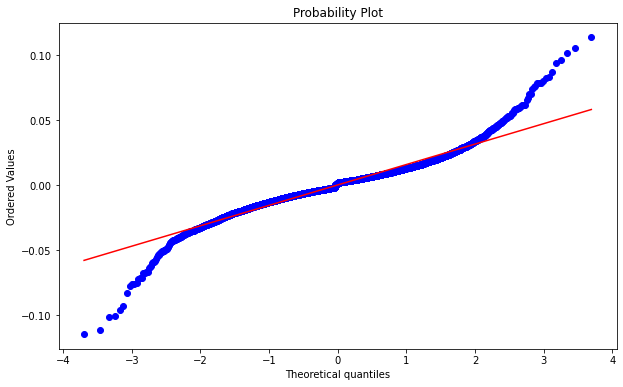

In [275]:
stats.probplot(data['Returns'], dist="norm", plot=plt)

((array([-3.69575503, -3.46402686, -3.33648808, ...,  3.33648808,
          3.46402686,  3.69575503]),
  array([ 207.31,  207.59,  211.09, ..., 1834.18, 1837.49, 1838.96])),
 (428.77156517396287, 930.692990668986, 0.968887920785568))

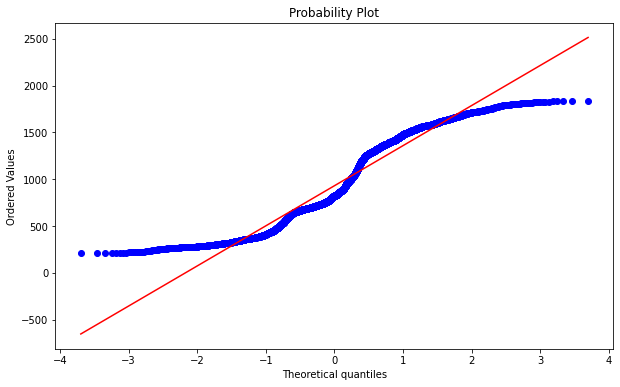

In [276]:
stats.probplot(data['Close'], dist="norm", plot=plt)

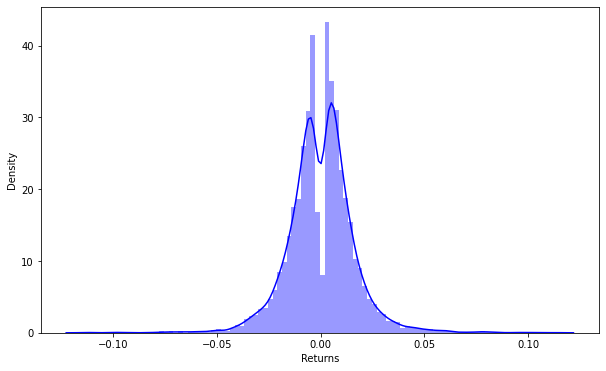

In [277]:
sns.distplot(data['Returns'], color = 'blue', bins = 100)

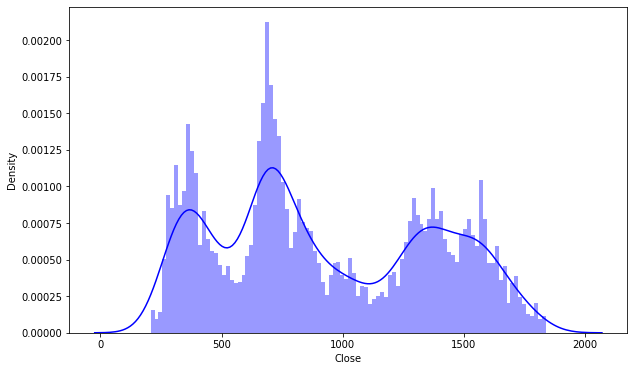

In [278]:
sns.distplot(data['Close'], color = 'blue', bins = 100)

In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6323 entries, 1990-10-17 to 2020-12-30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     6323 non-null   float64
 1   High     6323 non-null   float64
 2   Low      6323 non-null   float64
 3   Close    6323 non-null   float64
 4   Volume   6323 non-null   int64  
 5   Returns  6323 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 345.8 KB


In [280]:
data

,Open,High,Low,Close,Volume,Returns
Date,,,,,,
1990-10-17,653.69,653.69,646.43,646.99,26502278,-0.008863
1990-10-18,647.56,649.34,644.41,649.28,28491500,0.003533
1990-10-19,651.59,654.77,651.57,652.16,43333184,0.004426
1990-10-22,652.16,683.59,652.16,683.33,67541304,0.046688
1990-10-24,684.51,718.37,684.51,709.35,99226072,0.037371
...,...,...,...,...,...,...
2020-12-24,1420.60,1453.87,1409.75,1451.52,25464477270,0.024761
2020-12-25,1463.32,1486.84,1462.77,1486.31,21092586140,0.023685
2020-12-28,1505.15,1512.99,1452.48,1452.67,24908668980,-0.022893


In [281]:
df = data.copy()
df

,Open,High,Low,Close,Volume,Returns
Date,,,,,,
1990-10-17,653.69,653.69,646.43,646.99,26502278,-0.008863
1990-10-18,647.56,649.34,644.41,649.28,28491500,0.003533
1990-10-19,651.59,654.77,651.57,652.16,43333184,0.004426
1990-10-22,652.16,683.59,652.16,683.33,67541304,0.046688
1990-10-24,684.51,718.37,684.51,709.35,99226072,0.037371
...,...,...,...,...,...,...
2020-12-24,1420.60,1453.87,1409.75,1451.52,25464477270,0.024761
2020-12-25,1463.32,1486.84,1462.77,1486.31,21092586140,0.023685
2020-12-28,1505.15,1512.99,1452.48,1452.67,24908668980,-0.022893


In [282]:
df = df.loc['2000-01-01' : '2020-12-31']
df

,Open,High,Low,Close,Volume,Returns
Date,,,,,,
2000-01-04,490.32,499.52,490.01,498.46,513935904,0.033745
2000-01-06,467.32,469.86,443.46,443.46,408522688,-0.049256
2000-01-07,449.45,455.07,440.78,453.31,363069312,0.021969
2000-01-10,466.25,471.27,458.13,459.47,405888992,0.013497
2000-01-11,465.74,468.79,452.27,452.48,340244000,-0.015330
...,...,...,...,...,...,...
2020-12-24,1420.60,1453.87,1409.75,1451.52,25464477270,0.024761
2020-12-25,1463.32,1486.84,1462.77,1486.31,21092586140,0.023685
2020-12-28,1505.15,1512.99,1452.48,1452.67,24908668980,-0.022893


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4317 entries, 2000-01-04 to 2020-12-30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     4317 non-null   float64
 1   High     4317 non-null   float64
 2   Low      4317 non-null   float64
 3   Close    4317 non-null   float64
 4   Volume   4317 non-null   int64  
 5   Returns  4317 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 236.1 KB
